## MOwNiT - Laboratorium 3 - Dominik Jędraszek

In [1]:
#using Pkg
#Pkg.add("Interpolations")
#Pkg.add("Polynomials")
using Plots
using Interpolations
using Polynomials

#### 1. Implementacja interpolacji wielomianowej dla metody Lagrange'a.

In [2]:
function LagrangeInterpolation(xs,ys,x)
    A = ones(length(xs))
    d = 0.0
    for i = 1:length(xs)
        for j = [1:i-1;i+1:length(xs)]
            A[i] *= (x-xs[j])/(xs[i]-xs[j])
        end
        d += ys[i] * A[i]
    end
    return d
end

LagrangeInterpolation (generic function with 1 method)

Generujemy zestaw danych:

In [3]:
xs =  1:1:10
ys = [rand() for x in xs]

10-element Array{Float64,1}:
 0.6474708975298178
 0.9243933830696163
 0.32598391540565097
 0.8228195198351904
 0.0785157047879792
 0.49693315724709364
 0.30540595642238144
 0.9223054137234636
 0.8438639643435004
 0.7243337716694287

Testy działania funkcji dla wybranych węzłów interpolacji: (jak widać zgadzają się z zestawem danych)

In [4]:
function lag(x) return LagrangeInterpolation(xs,ys,x) end
lag(1.0),lag(2.0),lag(10.0)

(0.6474708975298178, 0.9243933830696163, 0.7243337716694287)

Wykres wielomianu interpolacyjnego wraz z węzłami interpolacji:

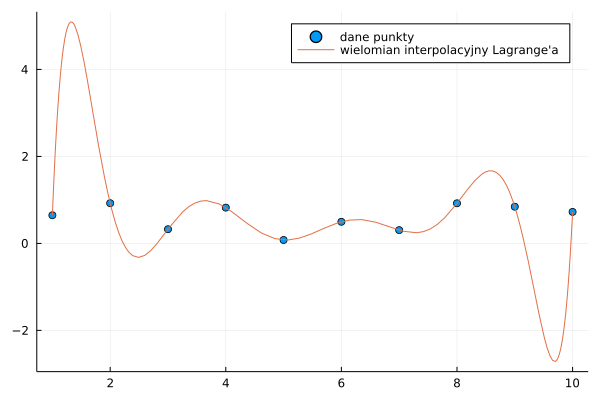

In [5]:
scatter(xs, ys, label="dane punkty")
plot!(lag, label="wielomian interpolacyjny Lagrange'a")

#### 2. Implementacja interpolacji wielomianowej dla metody Newton'a.

In [6]:
function createTable(x, y, n)
    for i = 2:n 
        for j = 1:n - i+1
            y[j,i] = ((y[j,i - 1] - y[j + 1,i - 1]) / (x[j]- x[i + j-1]))
        end
    end  
    return y
end

function product(i, value, x)
    pro = 1 
    for j = 1:i 
        pro *= value - x[j]
    end
    return pro
end 

function NewtonInterpolation(value, x, y, n)
    sum = y[1,1]; 
    for i = 2:n
        sum += product(i-1, value, x) * y[1,i] 
    end 
    return sum; 
end

function printTable(y, n)
    for i = 1:n 
        for j = 1:n-i+1
            print(string(round(y[i,j], digits=3),'\t'))
        end
        println(" "); 
    end
end

printTable (generic function with 1 method)

Przygotowujemy zestaw danych oraz tworzymy tabelę Hornera

In [7]:
n=length(xs)
x = xs
y =zeros((n, n))

for i = 1:n
    y[i,1]=ys[i]
end

y=createTable(x, y, n)   
printTable(y, n)

0.647	0.277	-0.438	0.328	-0.179	0.075	-0.025	0.007	-0.002	0.0	 
0.924	-0.598	0.548	-0.389	0.198	-0.074	0.023	-0.006	0.001	 
0.326	0.497	-0.621	0.401	-0.174	0.061	-0.019	0.005	 
0.823	-0.744	0.581	-0.295	0.133	-0.051	0.016	 
0.079	0.418	-0.305	0.236	-0.122	0.042	 
0.497	-0.192	0.404	-0.251	0.09	 
0.305	0.617	-0.348	0.109	 
0.922	-0.078	-0.021	 
0.844	-0.12	 
0.724	 


Wykres wielomianu interpolacyjnego wraz z węzłami interpolacji:

In [8]:
function newt(value) return NewtonInterpolation(value,x,y,n) end

newt (generic function with 1 method)

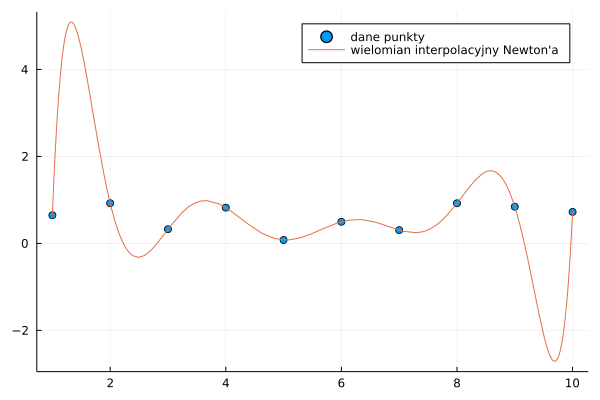

In [9]:
scatter(xs, ys, label="dane punkty")
plot!(newt, label="wielomian interpolacyjny Newton'a")

#### 3. Porównujemy powyższe na wykresie (+ metoda z pakietu Polynomials)

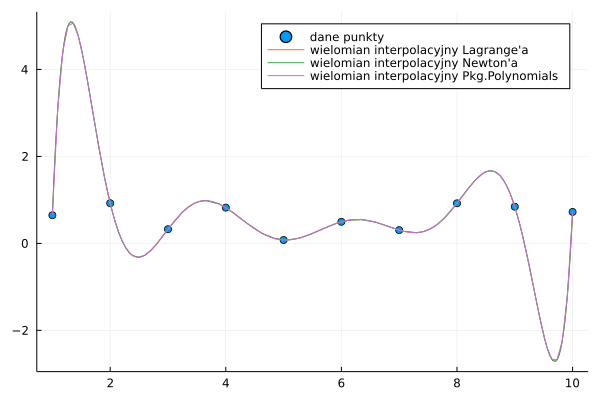

In [10]:
scatter(xs, ys, label="dane punkty")
plot!(lag, label="wielomian interpolacyjny Lagrange'a")
plot!(newt, label="wielomian interpolacyjny Newton'a")
plot!(fit(xs,ys),extrema(xs)..., label="wielomian interpolacyjny Pkg.Polynomials")

Można zauważyć, że wszystkie 3 wykresy są bardzo podobne do siebie. Dzieje się tak, gdyż wszystkie powyższe metody stosują tę samą ideę łączenia punktów w wielomian `liczba danych punktów`-stopnia .

#### 4. Porównujemy metody poprzez pomiar czasu dla zmiennej ilości węzłow interpolacji.

In [15]:
# using Pkg
# Pkg.add("DataFrames")
using DataFrames

method=["" for _ in 1:(10*6*3)]
size=[0 for _ in 1:(10*6*3)]
creating_time=zeros(10*6*3)
counting_time=zeros(10*6*3)
cnt = 1

for i = 1:10 #liczba testow
    for n = [2,5,10,20,35,50] #size
        xs =  1:1:n
        ys = [rand() for x in xs]
        
        if(cnt==1) #pierwszy test bez zapisu
            LagrangeInterpolation(xs,ys,4.3)
            yys =zeros((n,n))
            for a in 1:n 
                yys[a,1]=ys[a]
            end
            y=createTable(xs, yys, n)
            NewtonInterpolation(4.3,xs,yys,n)
            f=fit(xs,ys)
            f(4.3)
        end
        
        method[cnt]="lag"
        size[cnt]=n
        counting_time[cnt]= @elapsed LagrangeInterpolation(xs,ys,4.3)
        cnt+=1

        method[cnt]="newt"
        size[cnt]=n
        yys =zeros((n,n))
        for a in 1:n 
            yys[a,1]=ys[a]
        end
        creating_time[cnt]= @elapsed y=createTable(xs, yys, n)
        counting_time[cnt]= @elapsed NewtonInterpolation(4.3,xs,yys,n)
        cnt+=1

        method[cnt]="pkg"
        size[cnt]=n
        creating_time[cnt]= @elapsed f=fit(xs,ys)
        counting_time[cnt]= @elapsed f(4.3)
        cnt+=1
    end
end

data = DataFrame(method=method,size= size,creating_time=creating_time,counting_time=counting_time)

,method,size,creating_time,counting_time
,String,Int64,Float64,Float64
1,lag,2,0.0,1.394e-6
2,newt,2,9.09e-7,5.3e-7
3,pkg,2,1.726e-6,8.84e-7
4,lag,5,0.0,1.199e-6
5,newt,5,5.94e-7,4.61e-7
6,pkg,5,1.898e-6,3.89e-7
7,lag,10,0.0,1.7e-6
8,newt,10,7.11e-7,5.01e-7
9,pkg,10,1.682e-6,3.89e-7


Grupujemy dane:

In [16]:
using Statistics
grouped = sort(combine(groupby(data, [:method,:size]), nrow=> :liczba_testow,"creating_time" => mean,"creating_time"=>std,"counting_time" => mean,"counting_time"=>std),[:method,:size])

,method,size,liczba_testow,creating_time_mean,creating_time_std,counting_time_mean
,String,Int64,Int64,Float64,Float64,Float64
1,lag,2,10,0.0,0.0,8.168e-7
2,lag,5,10,0.0,0.0,1.1271e-6
3,lag,10,10,0.0,0.0,1.6715e-6
4,lag,20,10,0.0,0.0,5.0203e-6
5,lag,35,10,0.0,0.0,8.8831e-6
6,lag,50,10,0.0,0.0,1.62477e-5
7,newt,2,10,4.319e-7,1.68561e-7,3.746e-7
8,newt,5,10,4.906e-7,7.12994e-8,3.964e-7
9,newt,10,10,6.452e-7,7.77186e-8,4.644e-7


Rysujemy wykresy dla czasów tworzenia:

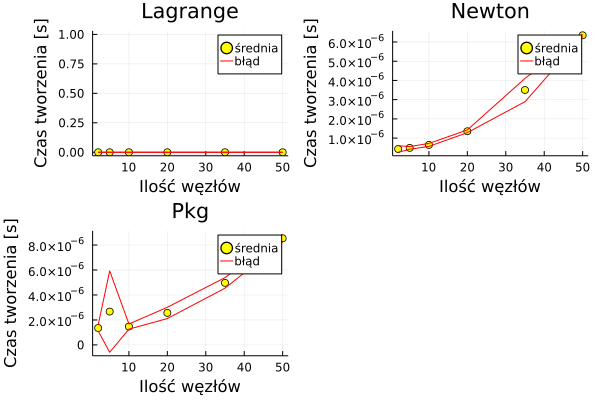

In [17]:
using Plots
p1 =scatter(grouped.size, grouped.creating_time_mean, group=grouped.method,  colour = :yellow, layout=3,title=["Lagrange" "Newton" "Pkg"],label="średnia")
plot!(p1,grouped.size, grouped.creating_time_mean-grouped.creating_time_std, group=grouped.method,  colour = :red, layout=3,label="błąd")
plot!(p1,grouped.size, grouped.creating_time_mean+grouped.creating_time_std, group=grouped.method,  colour = :red, layout=3,label="")
xlabel!("Ilość węzłów")
ylabel!("Czas tworzenia [s]")

Rysujemy wykresy dla czasów liczenia:

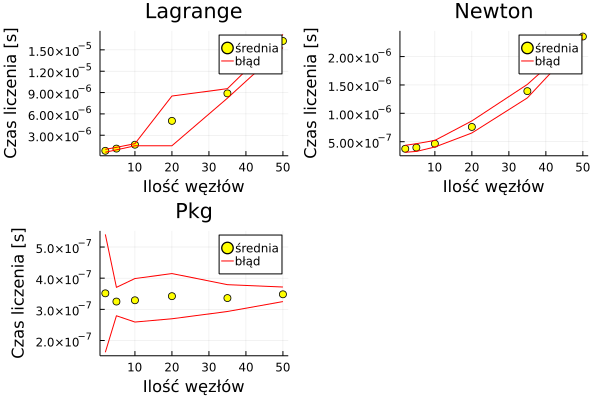

In [18]:
using Plots
p1 =scatter(grouped.size, grouped.counting_time_mean, group=grouped.method,  colour = :yellow, layout=3,title=["Lagrange" "Newton" "Pkg"],label="średnia")
plot!(p1,grouped.size, grouped.counting_time_mean-grouped.counting_time_std, group=grouped.method,  colour = :red, layout=3,label="błąd")
plot!(p1,grouped.size, grouped.counting_time_mean+grouped.counting_time_std, group=grouped.method,  colour = :red, layout=3,label="")
xlabel!("Ilość węzłów")
ylabel!("Czas liczenia [s]")